Mean Squared Error for Openness: 0.08081047666384218


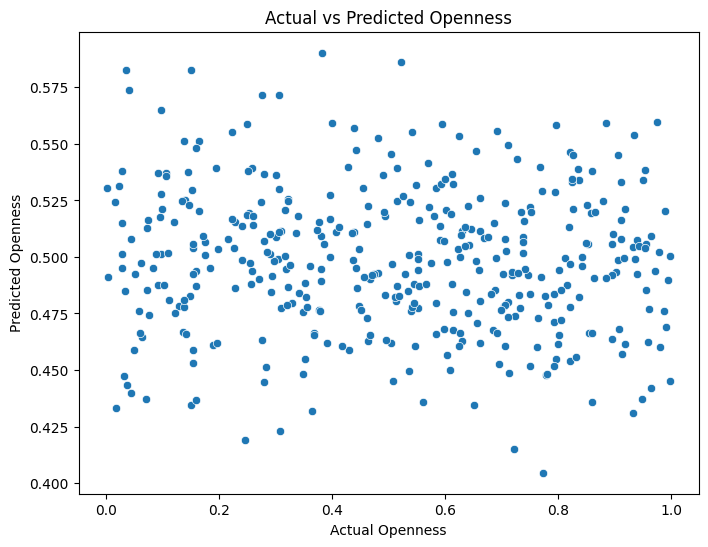

In [2]:
# Cell 1: Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Cell 2: Load dataset
df = pd.read_csv("handwriting.csv")

# Cell 3: Preprocessing
df = df.dropna()
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])  # Encode Gender: Male=1, Female=0, Other=2

# Drop non-numeric column 'Handwriting_Sample'
df = df.drop(columns=['Handwriting_Sample'])

# Define features and label
X = df.drop(columns=['Openness', 'Conscientiousness', 'Extraversion', 'Agreeableness', 'Neuroticism'])
y = df['Openness']

# Cell 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Cell 5: Regression model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Cell 6: Evaluation
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error for Openness:", mse)

# Cell 7: Visualization
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Openness")
plt.ylabel("Predicted Openness")
plt.title("Actual vs Predicted Openness")
plt.show()
